In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#label name of Fashion MNIST Dataset
label_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
np.random.seed(1)

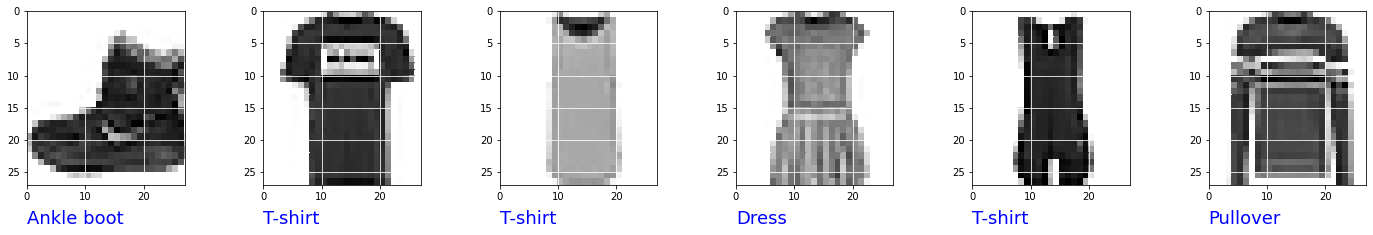

In [3]:
plt.figure(1, figsize=(24, 3.2)) 
plt.subplots_adjust(wspace=0.5) 
plt.gray()

for id in range(6):
    plt.subplot(1, 6, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(0, 33, "%s" % label_name[y_train[id]], color='blue', fontsize=18) 

    plt.xlim(0, 27)
    plt.ylim(27, 0)

    plt.grid('on', color='white') 
plt.show()

In [4]:
def model_show_indicator(MODEL, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, EPOCHS, BATCH_SIZE):
    startTime = time.time()
    history = MODEL.fit(X_TRAIN, Y_TRAIN, epochs=EPOCHS, batch_size= BATCH_SIZE, verbose=1, validation_data=(X_TEST, Y_TEST))
    endTime = time.time()
    score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0)

    plt.figure(1, figsize = (10, 4))
    plt.subplots_adjust(wspace = 0.5)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label = 'training', color = 'black')
    plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
    plt.ylim(0, 10)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label = 'training', color = 'black')
    plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()

    print("Computation time: {0: .3f}".format(endTime - startTime))
    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])

In [5]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다 
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)
        
        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1
            
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("label name of Fashion MNIST Dataset")
    print("T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 ")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))
    plt.show()

In [6]:
#initial settings
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
# 모델 객체 생성 및 메서드
model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])
# 모델 요약결과 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 1.9439 - accuracy: 0.4196 - val_loss: 1.6321 - val_accuracy: 0.5962
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.4594 - accuracy: 0.6496 - val_loss: 1.3249 - val_accuracy: 0.6687
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2191 - accuracy: 0.7085 - val_loss: 1.1410 - val_accuracy: 0.7179
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.7410 - val_loss: 1.0138 - val_accuracy: 0.7381
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9514 - accuracy: 0.7585 - val_loss: 0.9185 - val_accuracy: 0.7563
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8652 - accuracy: 0.7766 - val_loss: 0.8438 - val_accuracy: 0.7687
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7965 - accuracy: 0.7898 - val_loss: 0.7839 - val_accuracy: 0.7832
Epoch 8/10
60/60 [==

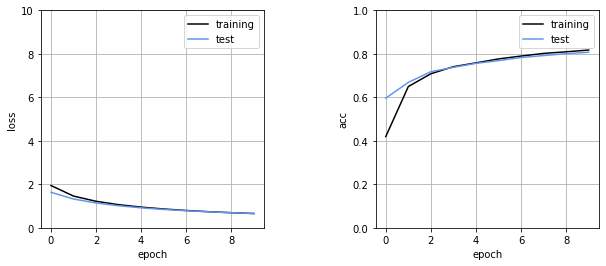

Computation time:  2.719
Test loss:  0.6603632569313049
Test accuracy:  0.8072999715805054


In [8]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 0s 868us/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  24 / 96


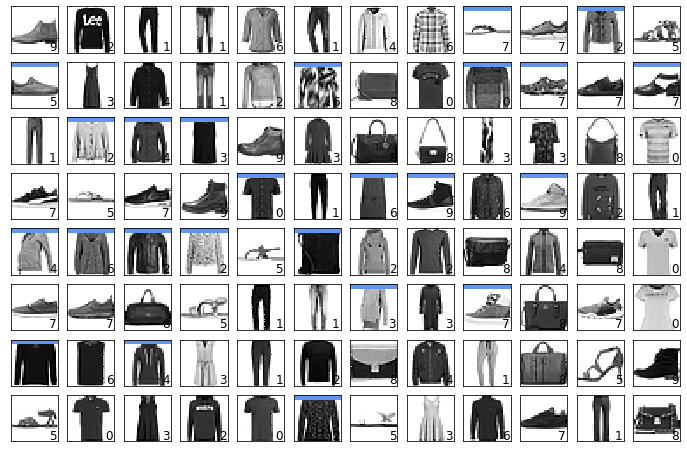

In [9]:
show_prediction()

In [10]:
model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])
# 모델 요약결과 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 1.5051 - accuracy: 0.5146 - val_loss: 1.0148 - val_accuracy: 0.6728
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8330 - accuracy: 0.7201 - val_loss: 0.7399 - val_accuracy: 0.7496
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.7807 - val_loss: 0.6397 - val_accuracy: 0.7862
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5897 - accuracy: 0.8084 - val_loss: 0.5821 - val_accuracy: 0.8034
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.8224 - val_loss: 0.5437 - val_accuracy: 0.8171
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.8312 - val_loss: 0.5179 - val_accuracy: 0.8253
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.8375 - val_loss: 0.5071 - val_accuracy: 0.8260
Epoch 8/10
60/60 [==

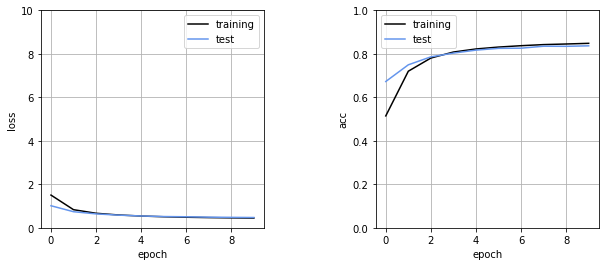

Computation time:  2.713
Test loss:  0.47304457426071167
Test accuracy:  0.836899995803833


In [11]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 0s 1ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  15 / 96


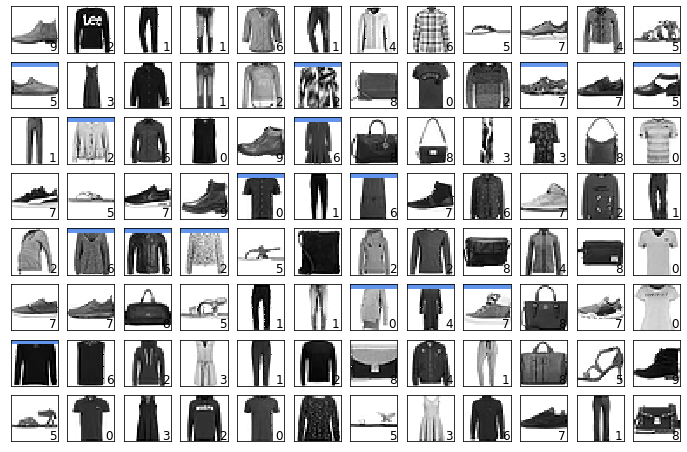

In [12]:
show_prediction()

In [13]:
#load fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding ='same', input_shape = (28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,810
Trainable params: 62,810
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 3s 52ms/step - loss: 0.9390 - accuracy: 0.7183 - val_loss: 0.5636 - val_accuracy: 0.8019
Epoch 2/10
60/60 [==============================] - 3s 49ms/step - loss: 0.4896 - accuracy: 0.8322 - val_loss: 0.4695 - val_accuracy: 0.8357
Epoch 3/10
60/60 [==============================] - 3s 49ms/step - loss: 0.4223 - accuracy: 0.8550 - val_loss: 0.4318 - val_accuracy: 0.8480
Epoch 4/10
60/60 [==============================] - 3s 50ms/step - loss: 0.3851 - accuracy: 0.8673 - val_loss: 0.4040 - val_accuracy: 0.8593
Epoch 5/10
60/60 [==============================] - 3s 48ms/step - loss: 0.3601 - accuracy: 0.8755 - val_loss: 0.3860 - val_accuracy: 0.8653
Epoch 6/10
60/60 [==============================] - 3s 49ms/step - loss: 0.3394 - accuracy: 0.8820 - val_loss: 0.3711 - val_accuracy: 0.8710
Epoch 7/10
60/60 [==============================] - 3s 50ms/step - loss: 0.3260 - accuracy: 0.8855 - val_loss: 0.3585 - val_accuracy: 0.8753
Epoch 8/10
60

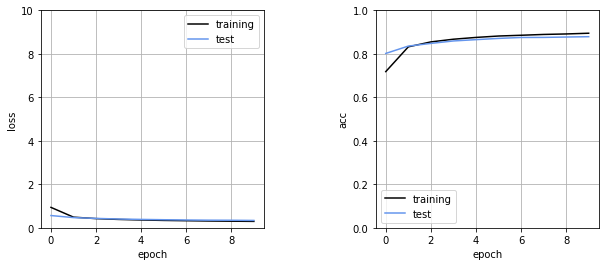

Computation time:  30.014
Test loss:  0.3383404612541199
Test accuracy:  0.8788999915122986


In [16]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 1s 2ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  11 / 96


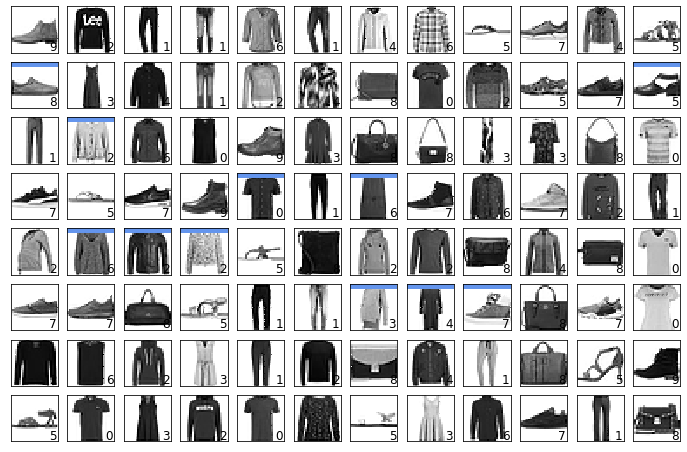

In [17]:
show_prediction()

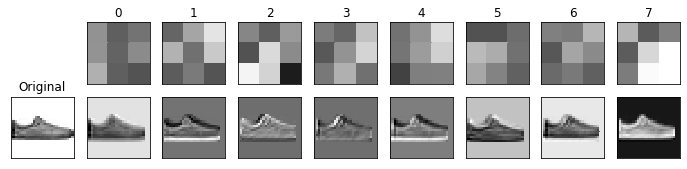

In [18]:
plt.figure(1, figsize = (12, 2.5))
plt.gray()
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, : , : , 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

# layers[0] 번째 레이어의 매개변수를 갖고오는 메서드
# get_weights()[0] 은 가중치 매개변수(conv 에서는 커널의 weight)
# get_weights()[1] 은 바이어스의 매개변수를 갖고온다
w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i] # 0 ~ 7(총 여덟개) 의 필터를 순차적으로 가져온다. w.shape : (3, 3, 1, 8)
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin = min_w, vmax = max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    
    # 필터 처리
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih : ih + 3, iw: iw +3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()
# 9의 이미지에 각각의 필터를 적용한 이미지
# 작은 값은 흰색, 큰 값은 검은색 으로 나타남
# 2번 필터는 가로줄 아래쪽 엣지를 강조
# 7번 필터는 가로 윗쪽 엣지를 강조

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same',input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (A) 최대 풀링층 2 * 2
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (B) 최대 풀링층 2 * 2
model.add(Dropout(0.25)) # (C) Dropout 수행으로 0.25는 남는 뉴런의 비율을 의미
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25)) # (D) Dropout 수행
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

Epoch 1/10
60/60 [==============================] - 31s 514ms/step - loss: 0.8388 - accuracy: 0.6991 - val_loss: 0.4853 - val_accuracy: 0.8249
Epoch 2/10
60/60 [==============================] - 29s 479ms/step - loss: 0.4571 - accuracy: 0.8345 - val_loss: 0.3867 - val_accuracy: 0.8603
Epoch 3/10
60/60 [==============================] - 29s 476ms/step - loss: 0.3778 - accuracy: 0.8638 - val_loss: 0.3474 - val_accuracy: 0.8744
Epoch 4/10
60/60 [==============================] - 28s 475ms/step - loss: 0.3406 - accuracy: 0.8758 - val_loss: 0.3160 - val_accuracy: 0.8857
Epoch 5/10
60/60 [==============================] - 28s 474ms/step - loss: 0.3146 - accuracy: 0.8844 - val_loss: 0.3013 - val_accuracy: 0.8923
Epoch 6/10
60/60 [==============================] - 28s 473ms/step - loss: 0.2937 - accuracy: 0.8935 - val_loss: 0.2869 - val_accuracy: 0.8932
Epoch 7/10
60/60 [==============================] - 29s 479ms/step - loss: 0.2771 - accuracy: 0.8985 - val_loss: 0.2725 - val_accuracy: 0.9004

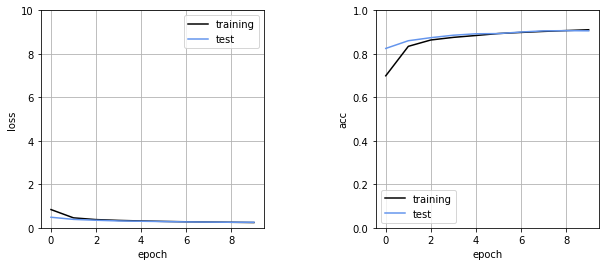

Computation time:  288.408
Test loss:  0.25443023443222046
Test accuracy:  0.9059000015258789


In [ ]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 10, 1000)

313/313 [==============================] - 2s 6ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  10 / 96


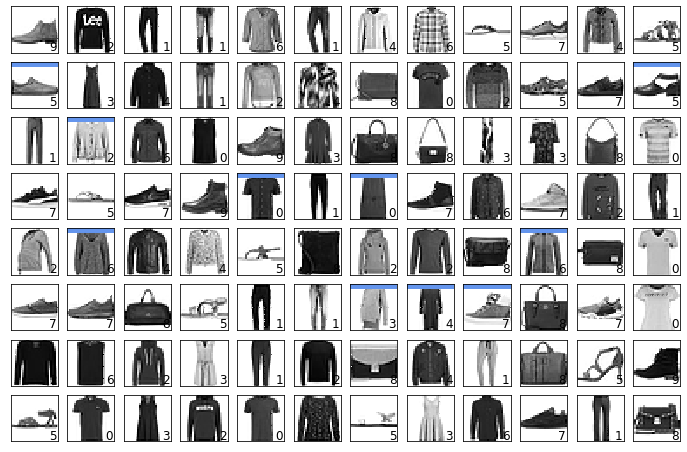

In [ ]:
show_prediction()

In [33]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same',input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (A) 최대 풀링층 2 * 2
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (B) 최대 풀링층 2 * 2
model.add(Dropout(0.3)) # (C) Dropout 수행으로 0.25는 남는 뉴런의 비율을 의미
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3)) # (D) Dropout 수행
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)        

Epoch 1/25
1200/1200 [==============================] - 42s 34ms/step - loss: 0.4699 - accuracy: 0.8315 - val_loss: 0.3096 - val_accuracy: 0.8893
Epoch 2/25
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2935 - accuracy: 0.8917 - val_loss: 0.2510 - val_accuracy: 0.9085
Epoch 3/25
1200/1200 [==============================] - 40s 34ms/step - loss: 0.2494 - accuracy: 0.9089 - val_loss: 0.2384 - val_accuracy: 0.9136
Epoch 4/25
1200/1200 [==============================] - 40s 33ms/step - loss: 0.2231 - accuracy: 0.9176 - val_loss: 0.2213 - val_accuracy: 0.9184
Epoch 5/25
1200/1200 [==============================] - 40s 34ms/step - loss: 0.2040 - accuracy: 0.9251 - val_loss: 0.2180 - val_accuracy: 0.9206
Epoch 6/25
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1895 - accuracy: 0.9302 - val_loss: 0.2056 - val_accuracy: 0.9250
Epoch 7/25
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1754 - accuracy: 0.9350 - val_loss: 0.2068 -

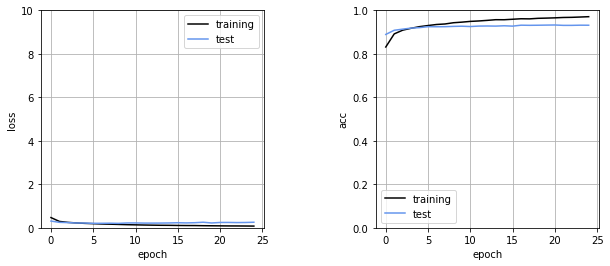

Computation time:  1029.212
Test loss:  0.25585106015205383
Test accuracy:  0.9315999746322632


In [34]:
model_show_indicator(model, x_train, y_train, x_test, y_test, 25, 50)

313/313 [==============================] - 2s 6ms/step
label name of Fashion MNIST Dataset
T-shirt => 0, Trouser => 1, Pullover => 2, Dress => 3, Coat => 4, Sandal => 5, Shirt => 6, Sneaker => 7, Bag => 8, Ankle boot => 9 
Total wrong answer:  7 / 96


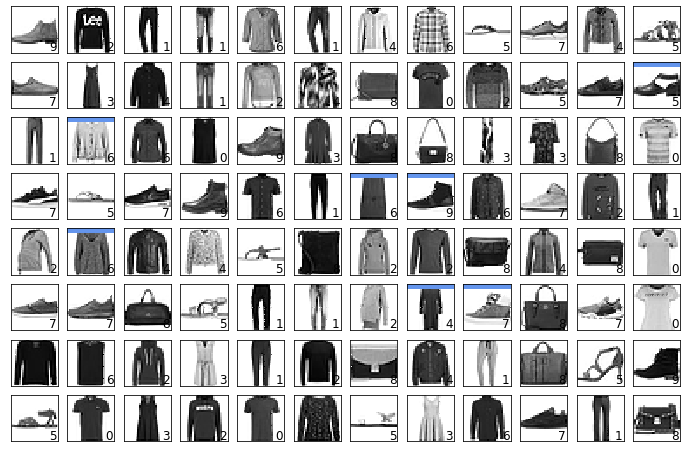

In [35]:
show_prediction()